# Statsforecast

Zbiór danych: https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale

Dokumentacja https://pypi.org/project/statsforecast/

https://nixtlaverse.nixtla.io/statsforecast/docs/getting-started/getting_started_short.html

In [1]:
#pip install statsforecast

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from statsforecast.models import  AutoARIMA, AutoTheta, HistoricAverage, AutoETS
from statsforecast import StatsForecast

In [3]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [4]:
# Przygotowanie danych panelowych
df_2 = pd.read_csv("data/ExportSales.csv")
df_2 = df_2[df_2['Product Code'].isin([30001278,
30001279,
30001280,
30001281,
30001282,
30001284,
30001285,
30001286,
30001287
])]
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2 = df_2.set_index('Date')
df_panel = df_2[['Product Code','QTY','Total Price']].groupby('Product Code')[['QTY','Total Price']].resample('ME').sum().reset_index()
df_panel['price'] = df_panel['Total Price'] / df_panel['QTY']
df_panel = df_panel[df_panel['Date']<='2022-07-31']
df_panel = df_panel.fillna(0)

In [5]:
# pokazanie danych
df_panel.tail()

,Product Code,Date,QTY,Total Price,price
253,30001287,2022-03-31,325,2369.97949,7.292245
254,30001287,2022-04-30,550,4389.22000,7.980400
255,30001287,2022-05-31,450,3819.80000,8.488444
256,30001287,2022-06-30,300,2713.62000,9.045400
257,30001287,2022-07-31,100,918.74000,9.187400


In [6]:
# Dopasowanie kolumn do nazw w statsforecast
df_panel = df_panel.rename(columns={'Date': 'ds', 'QTY': 'y', 'Product Code': 'unique_id'})

In [7]:
df_panel.head()

,unique_id,ds,y,Total Price,price
0,30001278,2020-05-31,100,1550.16800,15.501680
1,30001278,2020-06-30,667,7892.97785,11.833550
2,30001278,2020-07-31,228,2859.07600,12.539807
3,30001278,2020-08-31,717,12688.70708,17.696942
4,30001278,2020-09-30,667,10357.74962,15.528860


In [8]:
# Maksymalna data w zbiorze
df_panel.ds.max()

Timestamp('2022-07-31 00:00:00')

In [9]:
# train/ test
train = df_panel[df_panel['ds']<='2022-04-30'].reset_index(drop=True)
test = df_panel[df_panel['ds']>'2022-04-30'].reset_index(drop=True)

In [10]:
# Definicja modeli
models = [AutoARIMA(season_length=12),
          AutoTheta(season_length=12),
          AutoETS(season_length=12)]

In [11]:
# Model bez zmiennej egzogenicznej
sf = StatsForecast(models=models, freq='ME', fallback_model=HistoricAverage())


In [12]:
# fit + predict
forecasts_sf = sf.forecast(df = train[['unique_id','ds','y']],
                           h= 3)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


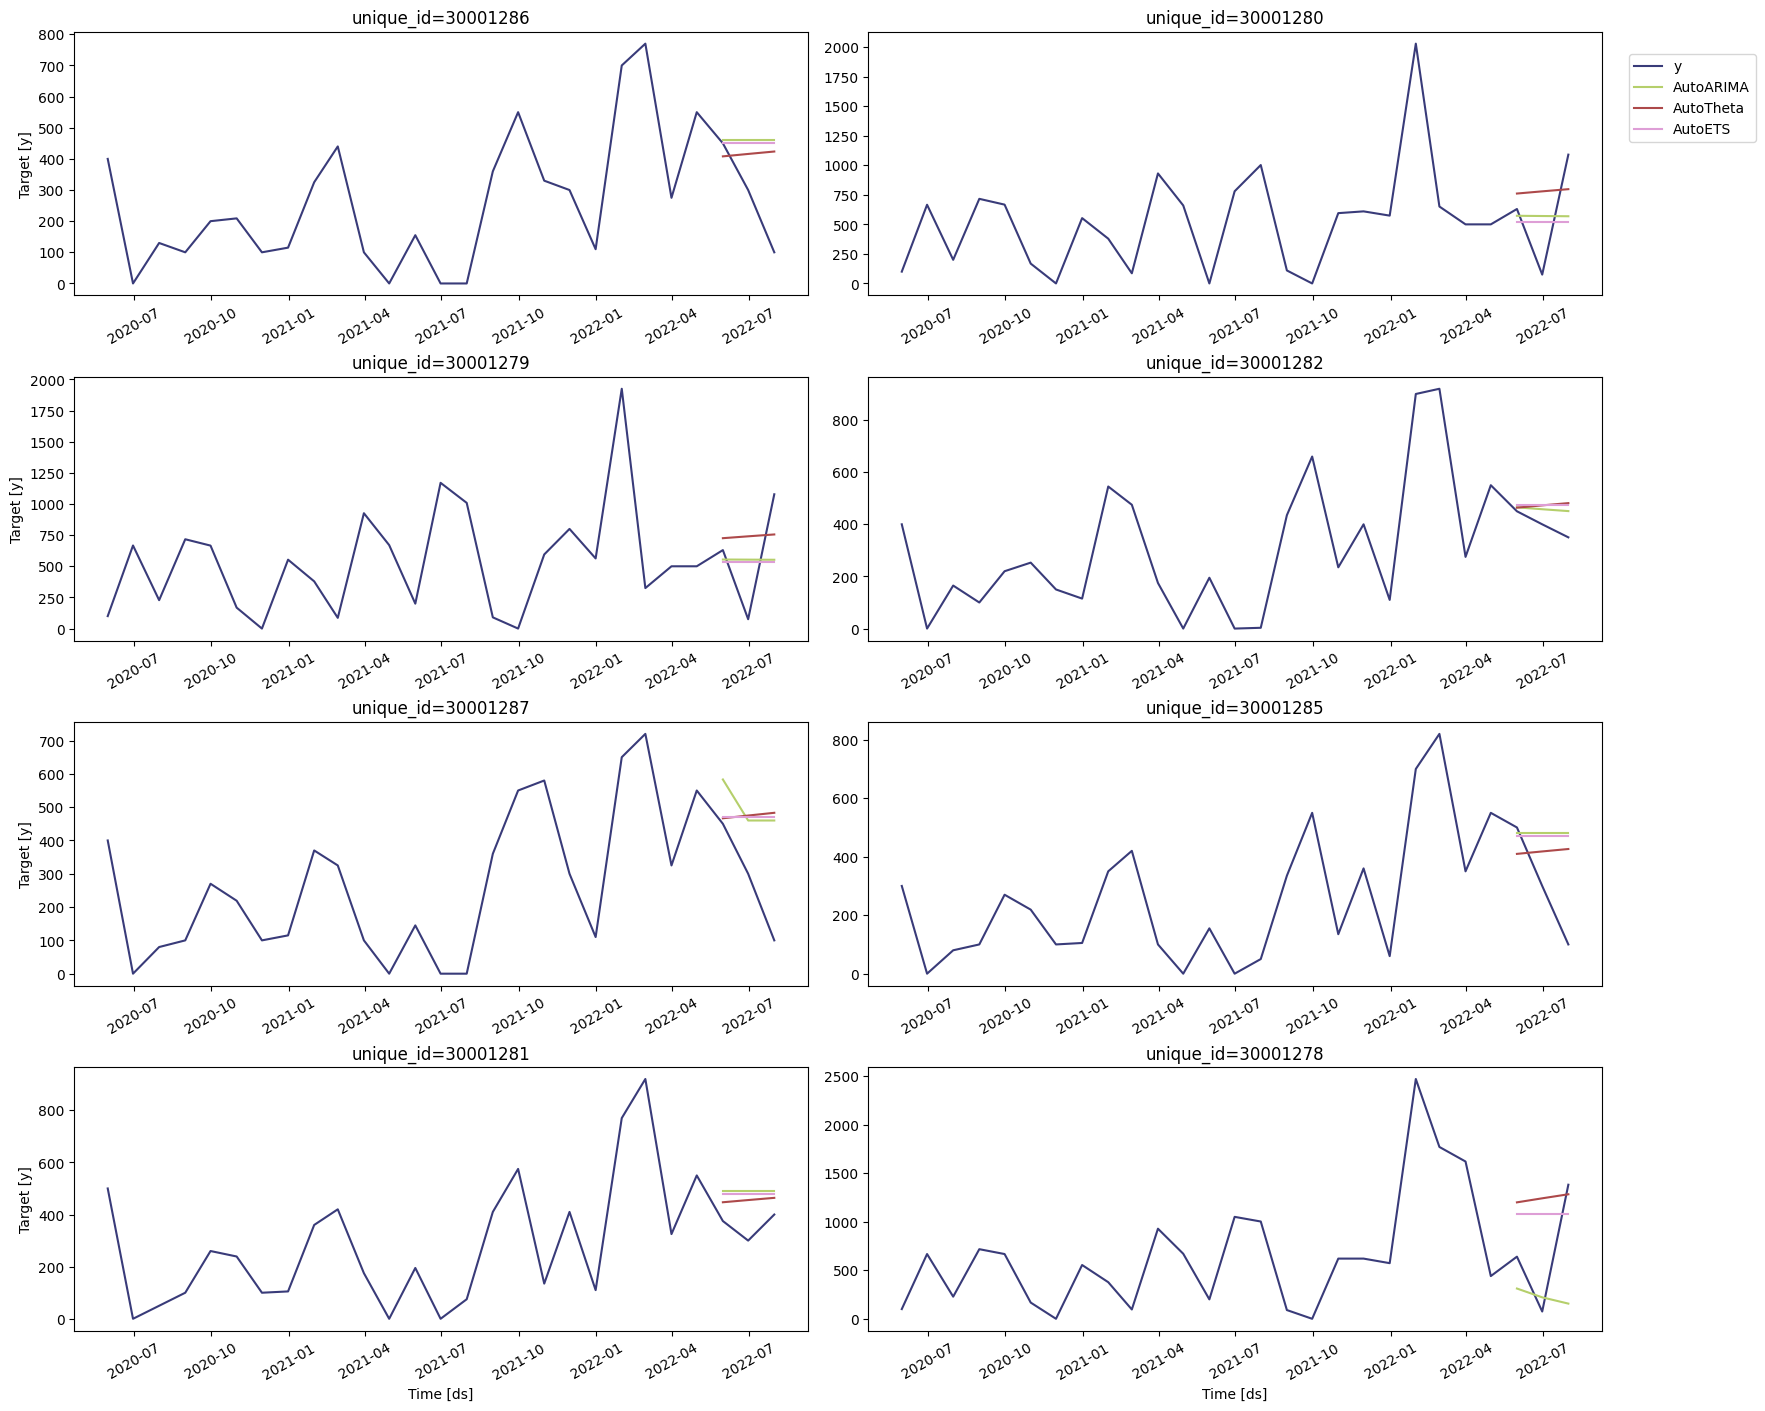

In [13]:
# Ocena wizualna
sf.plot(df_panel, forecasts_sf)


In [14]:
# Model ze zmienną egzogeniczną
sf_egz = StatsForecast = StatsForecast(models=models, freq='ME', fallback_model = HistoricAverage())

In [15]:
# fit + predict
forecasts_sf_egz = sf_egz.forecast(df = train[['unique_id','ds','y','price']],
                                   X_df = test[['unique_id','ds','price']],
                                   h=3)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [16]:
forecasts_sf_egz

,ds,AutoARIMA,AutoTheta,AutoETS
unique_id,,,,
30001278,2022-05-31,1004.654454,1199.399658,1078.665861
30001278,2022-06-30,1275.353040,1240.991577,1078.665861
30001278,2022-07-31,1035.996271,1282.583496,1078.665861
30001279,2022-05-31,922.278075,725.728516,534.180131
30001279,2022-06-30,1080.905373,740.703125,534.180131
30001279,2022-07-31,876.772303,755.677734,534.180131
30001280,2022-05-31,834.350186,760.872742,520.359730
30001280,2022-06-30,1058.348601,779.345581,520.359730
30001280,2022-07-31,859.417292,797.818481,520.359730


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


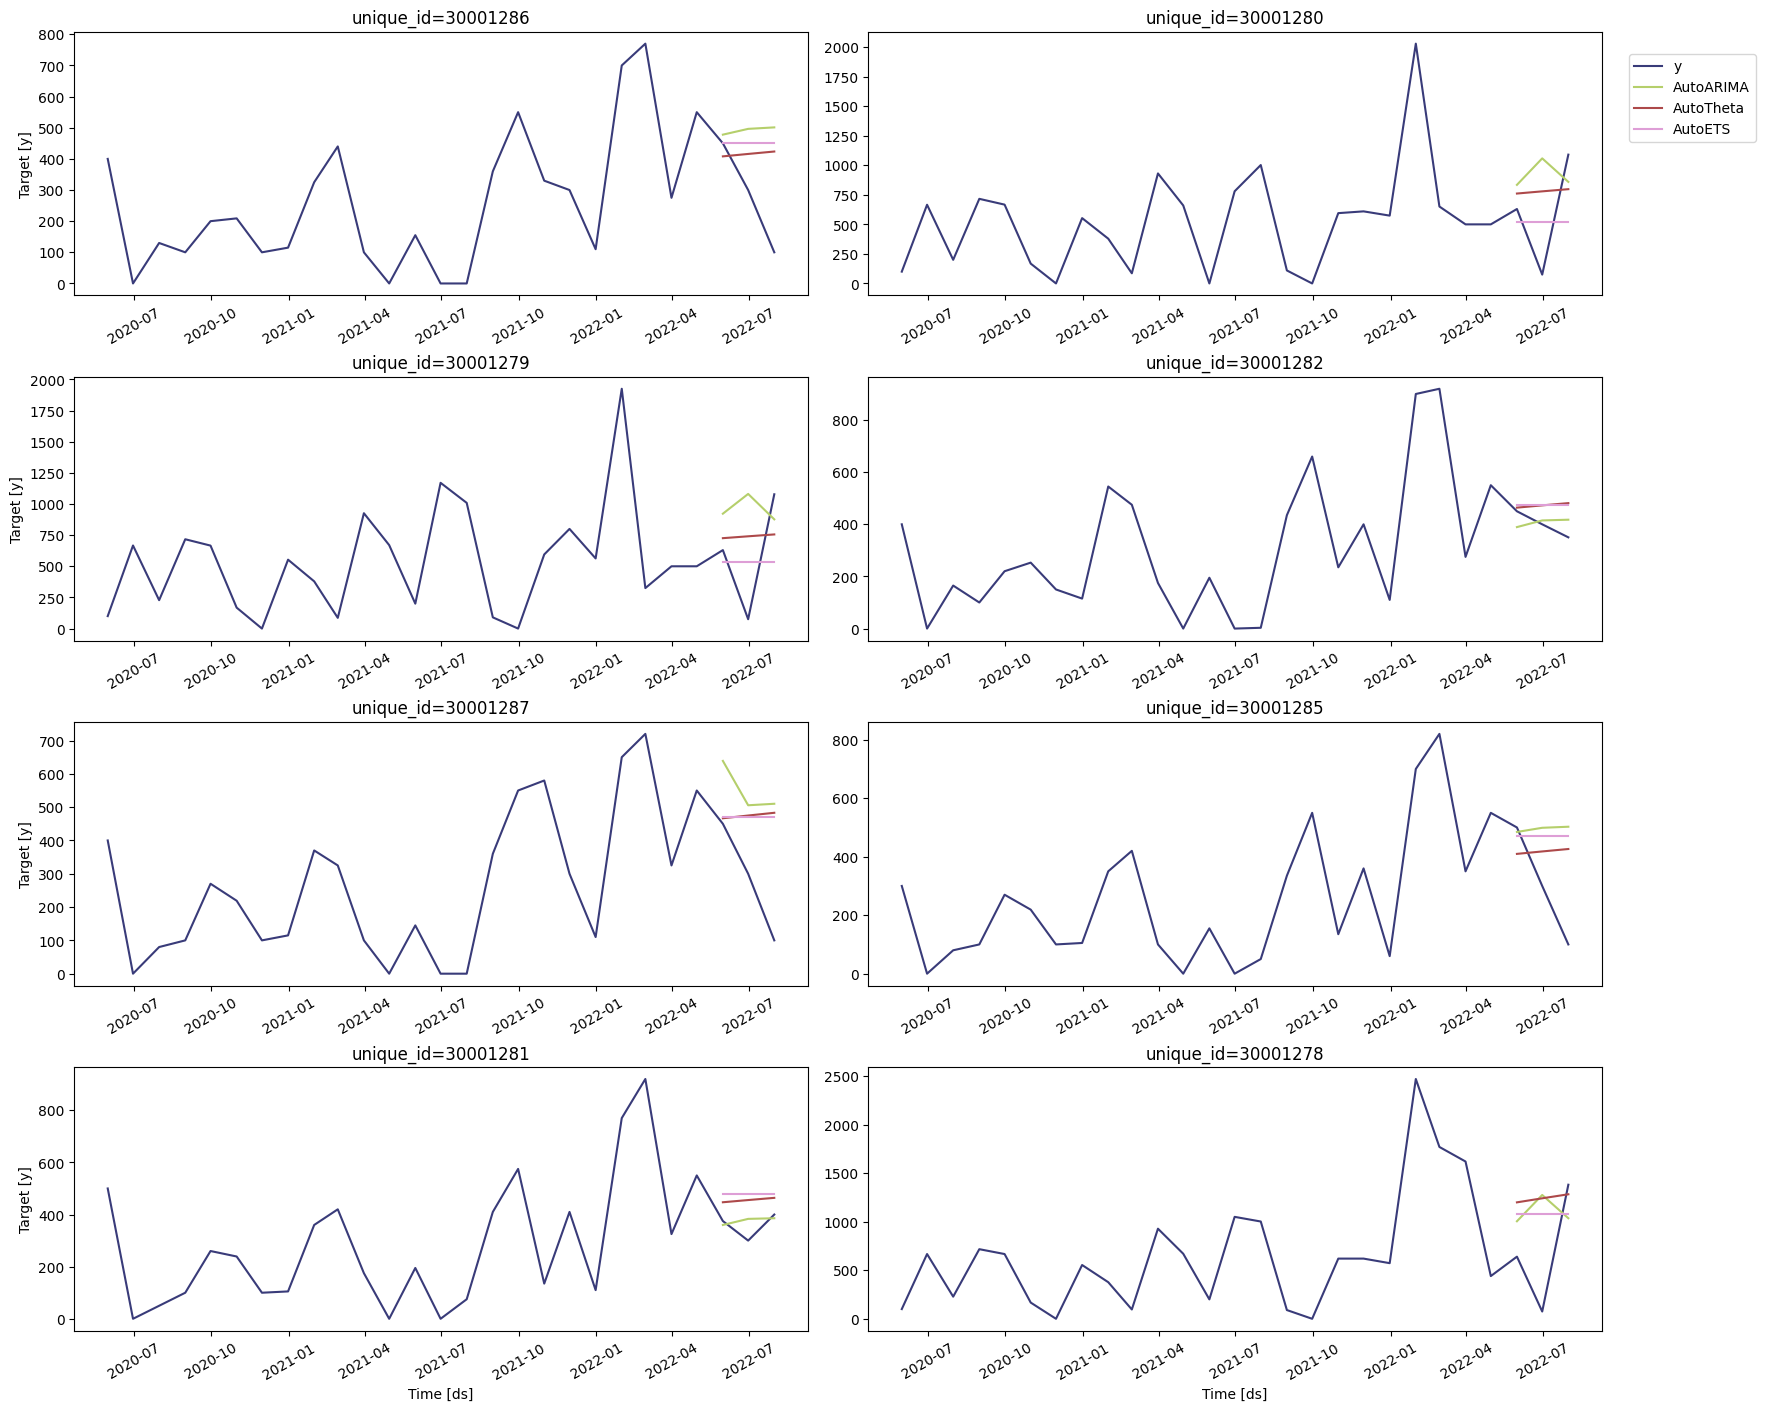

In [17]:
# Ocena wizualna
sf_egz.plot(df_panel,forecasts_sf_egz)